In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
def load_data(path):
    return pd.read_csv(path)

In [6]:
import os

In [7]:
path = "D:/VCCorp/data/ToyotaCorolla.csv"

In [8]:
toyota = load_data(path)

In [9]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [10]:
toyota.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
5,12950,32,61000,Diesel,90,0,0,2000,3,1170
6,16900,27,94612,Diesel,90,1,0,2000,3,1245
7,18600,30,75889,Diesel,90,1,0,2000,3,1245
8,21500,27,19700,Petrol,192,0,0,1800,3,1185
9,12950,23,71138,Diesel,69,0,0,1900,3,1105


In [11]:
learning_rate = 0.001
batch_sizes = 200
n_epochs = 50

# Preprocessing

In [12]:
toyota['FuelType'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: FuelType, dtype: int64

In [13]:
toyota.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


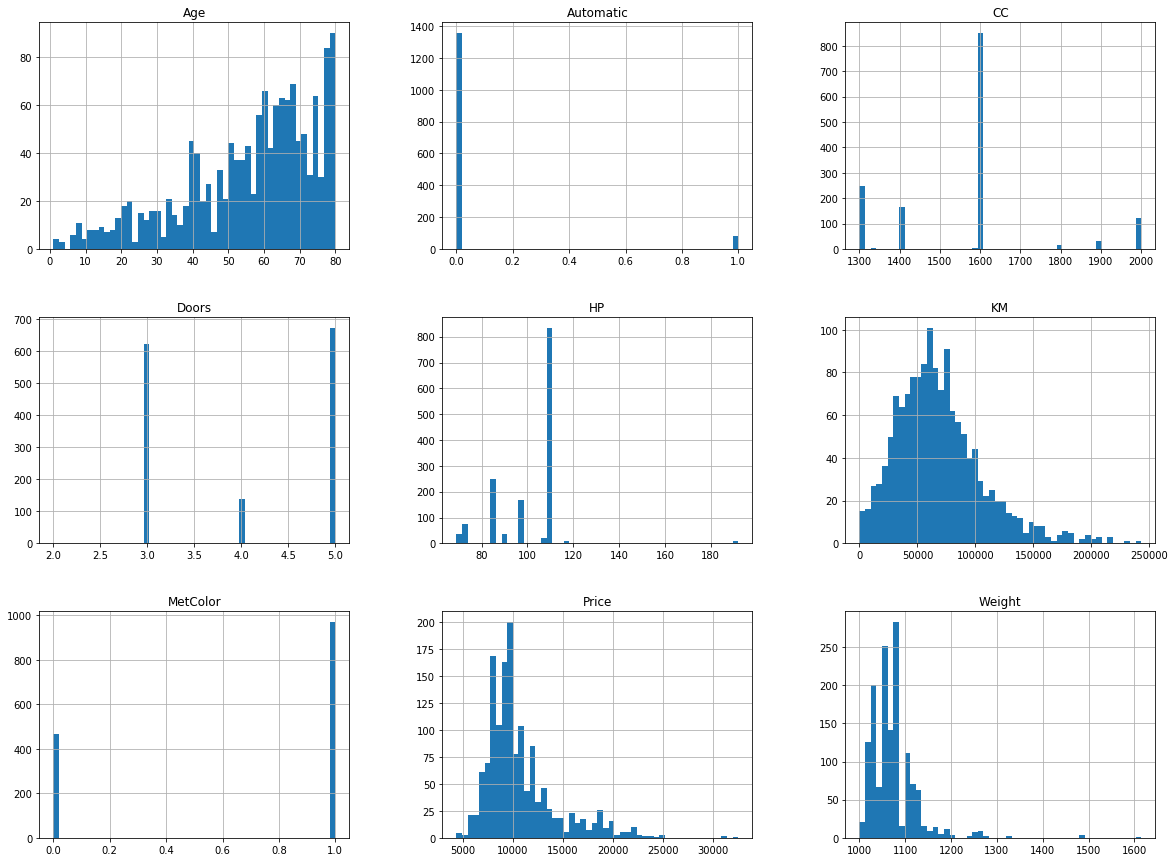

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
toyota.hist(bins=50, figsize=(20, 15))
plt.show()

In [15]:
corr_matrix = toyota.corr()

In [16]:
corr_matrix['Price']

Price        1.000000
Age         -0.876590
KM          -0.569960
HP           0.314990
MetColor     0.108905
Automatic    0.033081
CC           0.165067
Doors        0.185326
Weight       0.581198
Name: Price, dtype: float64

In [17]:
from pandas.tools.plotting import scatter_matrix

c:\users\anhduc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B52ACE7908>,
      dtype=object)

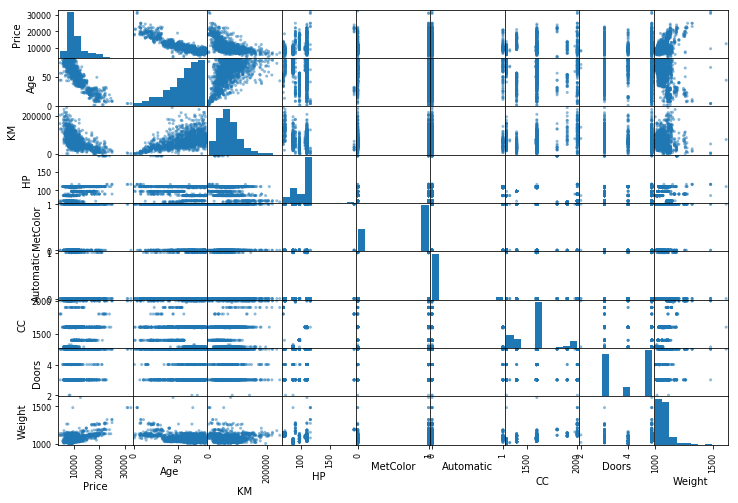

In [18]:
scatter_matrix(toyota, figsize=(12, 8))

In [19]:
from sklearn.preprocessing import LabelBinarizer

In [20]:
encoder = LabelBinarizer()

In [21]:
toyota['FuelType'] = encoder.fit_transform(toyota['FuelType'])

In [22]:
toyota['FuelType'].value_counts()

0    1419
1      17
Name: FuelType, dtype: int64

In [23]:
toyota.describe()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,0.011838,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,0.108196,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,0.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,0.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,0.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,1.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [24]:
import os

In [25]:
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [26]:
import time

In [27]:
learning_rate = 0.01

In [28]:
batch_sizes = 128

In [29]:
n_epochs = 1000

In [30]:
corr_matrix = toyota.corr()

In [31]:
corr_matrix['Price']

Price        1.000000
Age         -0.876590
KM          -0.569960
FuelType    -0.039536
HP           0.314990
MetColor     0.108905
Automatic    0.033081
CC           0.165067
Doors        0.185326
Weight       0.581198
Name: Price, dtype: float64

# Tao tap train va test

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
toyota_features = toyota.drop('Price', axis=1)

In [35]:
x_data = scaler.fit_transform(toyota_features)

In [36]:
y_data = np.array(toyota['Price'])

In [37]:
x_data.shape

(1436, 9)

In [38]:
y_data = y_data.reshape(y_data.shape[0], 1)

In [39]:
y_data.shape

(1436, 1)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [63]:
n_dim = x_train.shape[1]
n_dim

9

In [64]:
X = tf.placeholder(tf.float32, [None, n_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# Initialize w and bias

In [65]:
w = tf.Variable(tf.ones([n_dim, 1]))

In [66]:
b = tf.Variable(0.0, tf.float32)

# Predict price

In [67]:
Y_pred = tf.add(tf.matmul(X, w), b)

# Loss function

In [68]:
loss = tf.reduce_mean(tf.square(Y_pred-Y))

In [69]:
learning_rate = 0.01

In [70]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [71]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(n_epochs):
    sess.run(optimizer, feed_dict={X: x_train, Y: y_train})
    test_loss = sess.run(loss, feed_dict={X: x_test, Y: y_test})
        
    loss_history[epoch] = test_loss
    if (epoch%50==0):
        print('Epoch: {0}, test_loss: {1}'.format(epoch, test_loss))
        
w, b = sess.run([w, b])
print(w, b)
    

Epoch: 0, test_loss: 114391504.0
Epoch: 50, test_loss: 15621093.0
Epoch: 100, test_loss: 14343049.0
Epoch: 150, test_loss: 13349553.0
Epoch: 200, test_loss: 12453529.0
Epoch: 250, test_loss: 11648663.0
Epoch: 300, test_loss: 10923390.0
Epoch: 350, test_loss: 10267578.0
Epoch: 400, test_loss: 9672642.0
Epoch: 450, test_loss: 9131289.0
Epoch: 500, test_loss: 8637310.0
Epoch: 550, test_loss: 8185383.0
Epoch: 600, test_loss: 7770931.5
Epoch: 650, test_loss: 7390008.0
Epoch: 700, test_loss: 7039186.0
Epoch: 750, test_loss: 6715484.0
Epoch: 800, test_loss: 6416292.5
Epoch: 850, test_loss: 6139322.5
Epoch: 900, test_loss: 5882557.5
Epoch: 950, test_loss: 5644208.0
[[-4468.8774 ]
 [-2546.577  ]
 [ -321.49222]
 [ 3762.0947 ]
 [ 1032.283  ]
 [  757.6127 ]
 [ 2363.1753 ]
 [ 2806.7803 ]
 [ 2861.684  ]] 9502.479
